# Start Wars Social Network Analysis

In [1]:
import os
import json

## Data Content

In [2]:
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/starwars-episode-1-interactions-allCharacters.json
data/starwars-episode-1-interactions.json
data/starwars-episode-1-mentions.json
data/starwars-episode-2-interactions-allCharacters.json
data/starwars-episode-2-interactions.json
data/starwars-episode-2-mentions.json
data/starwars-episode-3-interactions-allCharacters.json
data/starwars-episode-3-interactions.json
data/starwars-episode-3-mentions.json
data/starwars-episode-4-interactions-allCharacters.json
data/starwars-episode-4-interactions.json
data/starwars-episode-4-mentions.json
data/starwars-episode-5-interactions-allCharacters.json
data/starwars-episode-5-interactions.json
data/starwars-episode-5-mentions.json
data/starwars-episode-6-interactions-allCharacters.json
data/starwars-episode-6-interactions.json
data/starwars-episode-6-mentions.json
data/starwars-episode-7-interactions-allCharacters.json
data/starwars-episode-7-interactions.json
data/starwars-episode-7-mentions.json
data/starwars-full-interactions-allCharacters-me

## Full Character Interaction Exploration

In [3]:
with open('data/starwars-full-interactions-allCharacters.json') as full_character_interactions_file:
    full_char_interactions_data = json.load(full_character_interactions_file)

In [4]:
print(full_char_interactions_data['nodes'][0])
print(full_char_interactions_data['links'][0])

{'name': 'R2-D2', 'value': 171, 'colour': '#bde0f6'}
{'source': 1, 'target': 0, 'value': 17}


### Build Graph 

In [5]:
import networkx as nx
G = nx.Graph()

# Add graph nodes
for node in full_char_interactions_data['nodes']:
    G.add_node(node['name'])
    
#Add graph edges
for edge in full_char_interactions_data['links']:
    G.add_edge(full_char_interactions_data['nodes'][edge['source']]['name'], 
               full_char_interactions_data['nodes'][edge['target']]['name'])

In [6]:
print("Number of characters: ", G.number_of_nodes())
print("Number of interactions between characters: ", G.number_of_edges())

Number of characters:  112
Number of interactions between characters:  450


### Connectivity Analysis

In [7]:
print("Is connected: ", nx.is_connected(G))


Is connected:  False


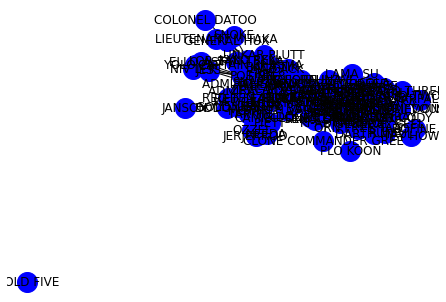

In [8]:
options = {
    'node_color': 'blue',
    'node_size': 400,
    'width': 1,
    'with_labels': True
}

nx.draw(G, **options)


## Handle Outliers

In [9]:
#Graph is not connected, list the "sparse list"
sparse_nodes = []
for each in list(nx.connected_components(G)):
    if len(each) < 10:
        print(each)
        sparse_nodes.append(each)

{'GOLD FIVE'}


Observation: Gold Five has no interactions and on the grounds of interactions is probably the least important to the plot

### Remove sparse nodes and edges

In [10]:
import copy
for each in sparse_nodes:
    for node in each:
        G.remove_node(node)

#### Calculate diameter without sparse nodes

In [11]:
nx.diameter(G)

6

## Character Importance Metrics

### Page Rank

PageRank computes a ranking of the nodes in the graph G based on the structure of the incoming links

In [12]:
page_ranks = nx.pagerank(G)
sorted(page_ranks.items(),key=lambda x : x[1], reverse = True)[:10]

[('ANAKIN', 0.04077521988021611),
 ('OBI-WAN', 0.037404108064095595),
 ('C-3PO', 0.033967299797439086),
 ('PADME', 0.03216498871205313),
 ('LUKE', 0.028580260473549328),
 ('HAN', 0.025579977938123163),
 ('QUI-GON', 0.025522143343111064),
 ('LEIA', 0.02499796794976556),
 ('JAR JAR', 0.02389322803331475),
 ('EMPEROR', 0.022366513281039457)]

Obseration: As the top rank, Anakin is probably one of the most important characters

### Degree Centrality

The degree centrality for a node v is the fraction of nodes it is connected to

In [13]:
centrality_degrees = nx.degree_centrality(G)
sorted(centrality_degrees.items(),key=lambda x : x[1], reverse = True)[:10]

[('ANAKIN', 0.3818181818181818),
 ('OBI-WAN', 0.33636363636363636),
 ('C-3PO', 0.32727272727272727),
 ('PADME', 0.3090909090909091),
 ('QUI-GON', 0.24545454545454545),
 ('LUKE', 0.24545454545454545),
 ('HAN', 0.23636363636363636),
 ('LEIA', 0.22727272727272727),
 ('JAR JAR', 0.21818181818181817),
 ('R2-D2', 0.20909090909090908)]

### Betweenness Centrality

Compute the shortest-path betweenness centrality for nodes.

Betweenness centrality of a node  is the sum of the fraction of all-pairs shortest paths that pass through 

In [14]:
centrality_betweenness = nx.betweenness_centrality(G)
sorted(centrality_betweenness.items(),key=lambda x : x[1], reverse = True)[:10]

[('OBI-WAN', 0.20904270024236493),
 ('C-3PO', 0.1711884223299381),
 ('ANAKIN', 0.16126763617311332),
 ('LUKE', 0.14428285350449743),
 ('HAN', 0.09816485899234716),
 ('DARTH VADER', 0.08674230925933331),
 ('EMPEROR', 0.0759727218500195),
 ('POE', 0.07445793115480652),
 ('PADME', 0.06937571548362509),
 ('CHEWBACCA', 0.06238218800973222)]

## Community Detection

In [21]:
from networkx.algorithms import community


### Partitions via centrality measure

In [ ]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)


In [22]:
sorted(map(sorted, top_level_communities))

[['ADMIRAL ACKBAR',
  'ADMIRAL STATURA',
  'BALA-TIK',
  'BB-8',
  'BERU',
  'BIB FORTUNA',
  'BIGGS',
  'BOBA FETT',
  'BOUSHH',
  'C-3PO',
  'CAMIE',
  'CAPTAIN ANTILLES',
  'CAPTAIN PHASMA',
  'CHEWBACCA',
  'COLONEL DATOO',
  'DACK',
  'DARTH VADER',
  'DERLIN',
  'DODONNA',
  'ELLO ASTY',
  'FINN',
  'GENERAL HUX',
  'GOLD LEADER',
  'HAN',
  'JANSON',
  'JERJERROD',
  'JESS',
  'KYLO REN',
  'LANDO',
  'LEIA',
  'LIEUTENANT MITAKA',
  'LOR SAN TEKKA',
  'LUKE',
  'MAZ',
  'MON MOTHMA',
  'MOTTI',
  'NEEDA',
  'NIV LEK',
  'OWEN',
  'OZZEL',
  'PIETT',
  'POE',
  'R2-D2',
  'RED LEADER',
  'RED TEN',
  'REY',
  'RIEEKAN',
  'SNAP',
  'SNOKE',
  'TARKIN',
  'UNKAR PLUTT',
  'WEDGE',
  'YOLO ZIFF',
  'ZEV'],
 ['ANAKIN',
  'BAIL ORGANA',
  'BOSS NASS',
  'BRAVO THREE',
  'BRAVO TWO',
  'CAPTAIN PANAKA',
  'CAPTAIN TYPHO',
  'CLIEGG',
  'CLONE COMMANDER CODY',
  'CLONE COMMANDER GREE',
  'COUNT DOOKU',
  'DARTH MAUL',
  'DOFINE',
  'EMPEROR',
  'FANG ZAR',
  'FODE/BEED',
  'GENERAL CE

In [23]:
sorted(map(sorted, next_level_communities))

[['ADMIRAL ACKBAR',
  'ADMIRAL STATURA',
  'BALA-TIK',
  'BB-8',
  'BERU',
  'BIB FORTUNA',
  'BIGGS',
  'BOBA FETT',
  'BOUSHH',
  'C-3PO',
  'CAMIE',
  'CAPTAIN ANTILLES',
  'CAPTAIN PHASMA',
  'CHEWBACCA',
  'DACK',
  'DARTH VADER',
  'DERLIN',
  'DODONNA',
  'ELLO ASTY',
  'FINN',
  'GOLD LEADER',
  'HAN',
  'JANSON',
  'JERJERROD',
  'JESS',
  'KYLO REN',
  'LANDO',
  'LEIA',
  'LOR SAN TEKKA',
  'LUKE',
  'MAZ',
  'MON MOTHMA',
  'MOTTI',
  'NEEDA',
  'NIV LEK',
  'OWEN',
  'OZZEL',
  'PIETT',
  'POE',
  'R2-D2',
  'RED LEADER',
  'RED TEN',
  'REY',
  'RIEEKAN',
  'SNAP',
  'TARKIN',
  'UNKAR PLUTT',
  'WEDGE',
  'YOLO ZIFF',
  'ZEV'],
 ['ANAKIN',
  'BAIL ORGANA',
  'BOSS NASS',
  'BRAVO THREE',
  'BRAVO TWO',
  'CAPTAIN PANAKA',
  'CAPTAIN TYPHO',
  'CLIEGG',
  'CLONE COMMANDER CODY',
  'CLONE COMMANDER GREE',
  'COUNT DOOKU',
  'DARTH MAUL',
  'DOFINE',
  'EMPEROR',
  'FANG ZAR',
  'FODE/BEED',
  'GENERAL CEEL',
  'GENERAL GRIEVOUS',
  'GIDDEAN DANU',
  'GREEDO',
  'JABBA',
  

### Bi-partition

In [26]:
community.kernighan_lin_bisection(G)

({'ANAKIN',
  'BAIL ORGANA',
  'BERU',
  'BIB FORTUNA',
  'BIGGS',
  'BOSS NASS',
  'BOUSHH',
  'BRAVO TWO',
  'CAMIE',
  'CAPTAIN ANTILLES',
  'CAPTAIN TYPHO',
  'COLONEL DATOO',
  'COUNT DOOKU',
  'DACK',
  'DODONNA',
  'DOFINE',
  'EMPEROR',
  'FODE/BEED',
  'GENERAL GRIEVOUS',
  'GIDDEAN DANU',
  'GREEDO',
  'JABBA',
  'JAR JAR',
  'JERJERROD',
  'JESS',
  'JOBAL',
  'KI-ADI-MUNDI',
  'KITSTER',
  'LUKE',
  'MACE WINDU',
  'NEEDA',
  'NIV LEK',
  'ODD BALL',
  'ORN FREE TAA',
  'OWEN',
  'OZZEL',
  'PADME',
  'PLO KOON',
  'QUI-GON',
  'R2-D2',
  'RABE',
  'RIC OLIE',
  'RUWEE',
  'SEBULBA',
  'SENATOR ASK AAK',
  'SHMI',
  'SOLA',
  'SUN RIT',
  'TARPALS',
  'TEY HOW',
  'VALORUM',
  'WALD',
  'WATTO',
  'YODA',
  'ZEV'},
 {'ADMIRAL ACKBAR',
  'ADMIRAL STATURA',
  'BALA-TIK',
  'BB-8',
  'BOBA FETT',
  'BRAVO THREE',
  'C-3PO',
  'CAPTAIN PANAKA',
  'CAPTAIN PHASMA',
  'CHEWBACCA',
  'CLIEGG',
  'CLONE COMMANDER CODY',
  'CLONE COMMANDER GREE',
  'DARTH MAUL',
  'DARTH VADER',
  '

### Louvain Community Detection

Uses Louvain Community Detection Algorithm

In [40]:
!pip install python-louvain
from community import community_louvain
partition = community_louvain.best_partition(G)

  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9394 sha256=cef540019966018a84374d2b0c4e89a1dcb5f786aee531da637e4e0764bee62c
  Stored in directory: c:\users\tiffany\appdata\local\pip\cache\wheels\af\40\91\ef3635f7d3ddbd889b5af9f1ac22b8d30c48d6f744cd74a6d1
Successfully built python-louvain


In [41]:
partition

{'R2-D2': 2,
 'CHEWBACCA': 1,
 'BB-8': 1,
 'QUI-GON': 2,
 'NUTE GUNRAY': 4,
 'PK-4': 4,
 'TC-14': 4,
 'OBI-WAN': 4,
 'DOFINE': 4,
 'RUNE': 4,
 'TEY HOW': 4,
 'EMPEROR': 2,
 'CAPTAIN PANAKA': 2,
 'SIO BIBBLE': 2,
 'JAR JAR': 2,
 'TARPALS': 2,
 'BOSS NASS': 2,
 'PADME': 2,
 'RIC OLIE': 2,
 'WATTO': 2,
 'ANAKIN': 2,
 'SEBULBA': 2,
 'JIRA': 2,
 'SHMI': 2,
 'C-3PO': 1,
 'DARTH MAUL': 4,
 'KITSTER': 2,
 'WALD': 2,
 'FODE/BEED': 2,
 'JABBA': 2,
 'GREEDO': 2,
 'VALORUM': 2,
 'MACE WINDU': 2,
 'KI-ADI-MUNDI': 2,
 'YODA': 2,
 'RABE': 2,
 'BAIL ORGANA': 2,
 'GENERAL CEEL': 4,
 'BRAVO TWO': 2,
 'BRAVO THREE': 2,
 'CAPTAIN TYPHO': 2,
 'SENATOR ASK AAK': 2,
 'ORN FREE TAA': 2,
 'SOLA': 2,
 'JOBAL': 2,
 'RUWEE': 2,
 'TAUN WE': 4,
 'LAMA SU': 4,
 'BOBA FETT': 1,
 'JANGO FETT': 4,
 'OWEN': 3,
 'BERU': 3,
 'CLIEGG': 3,
 'COUNT DOOKU': 4,
 'SUN RIT': 4,
 'POGGLE': 4,
 'PLO KOON': 2,
 'ODD BALL': 4,
 'GENERAL GRIEVOUS': 4,
 'FANG ZAR': 2,
 'MON MOTHMA': 1,
 'GIDDEAN DANU': 2,
 'CLONE COMMANDER GREE': 2,
 

#### Visualization

In [47]:
from matplotlib import pyplot as plt

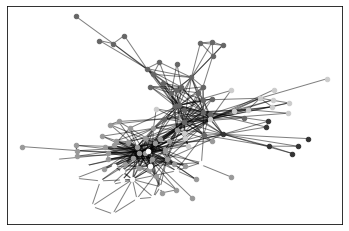

In [48]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0

for community in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == community]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()